# Mid Eval for PulseSort Project

## 1. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

## 2. Loading all CSV files and combining all feature files into one data frame

In [3]:
file_names = [
    'rest_data.csv',
    'index_finger_data.csv',
    'okay_data.csv',
    'thumb_data.csv',
    'fist_data.csv',
    'peace_data.csv',
    'three_data.csv',
    'four_data.csv',
    'rock_data.csv',
    'spread_data.csv',
    'clenched_data.csv',
    'up_data.csv'
]
dataframes = []
for file in file_names:
    df = pd.read_csv(file)
    dataframes.append(df)
data = pd.concat(dataframes, ignore_index=True)

## 3. Encoding the labels and creating rms, mav and mse

In [6]:
le = LabelEncoder()
data['label_encoded'] = le.fit_transform(data['label'])
label_map = dict(zip(le.transform(le.classes_), le.classes_))
print("Label Mapping:")
print(label_map)
def rms(signal):
    return np.sqrt(np.mean(signal**2))

def mav(signal):
    return np.mean(np.abs(signal))

def mse(signal):
    return np.mean((signal - np.mean(signal))**2)

# Apply to the columns
data['rms_ch1'] = data['ch1'].apply(lambda x: rms(np.array([x])))
data['rms_ch2'] = data['ch2'].apply(lambda x: rms(np.array([x])))
data['mav_ch1'] = data['ch1'].apply(lambda x: mav(np.array([x])))
data['mav_ch2'] = data['ch2'].apply(lambda x: mav(np.array([x])))
data['mse_ch1'] = data['ch1'].apply(lambda x: mse(np.array([x])))
data['mse_ch2'] = data['ch2'].apply(lambda x: mse(np.array([x])))

Label Mapping:
{0: 'clenched', 1: 'fist', 2: 'four', 3: 'index_finger', 4: 'okay', 5: 'peace', 6: 'rest', 7: 'rock', 8: 'spread', 9: 'three', 10: 'thumb', 11: 'up'}


## 4. Splitting 

In [8]:
X = data[['rms_ch1', 'rms_ch2', 'mav_ch1', 'mav_ch2', 'mse_ch1', 'mse_ch2']]
y = data['label_encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

## 5. Logistic regression

In [12]:
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## 6. Classification Report

In [13]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))


Classification Report:
              precision    recall  f1-score   support

    clenched       0.00      0.00      0.00      1200
        fist       0.00      0.00      0.00      1200
        four       0.08      0.05      0.06      1200
index_finger       0.00      0.00      0.00      1200
        okay       0.08      0.45      0.14      1200
       peace       0.00      0.00      0.00      1200
        rest       0.00      0.00      0.00      1200
        rock       0.00      0.00      0.00      1200
      spread       0.08      0.48      0.14      1200
       three       0.00      0.00      0.00      1200
       thumb       0.09      0.02      0.03      1200
          up       0.00      0.00      0.00      1200

    accuracy                           0.08     14400
   macro avg       0.03      0.08      0.03     14400
weighted avg       0.03      0.08      0.03     14400



C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 7. Confusion matrix

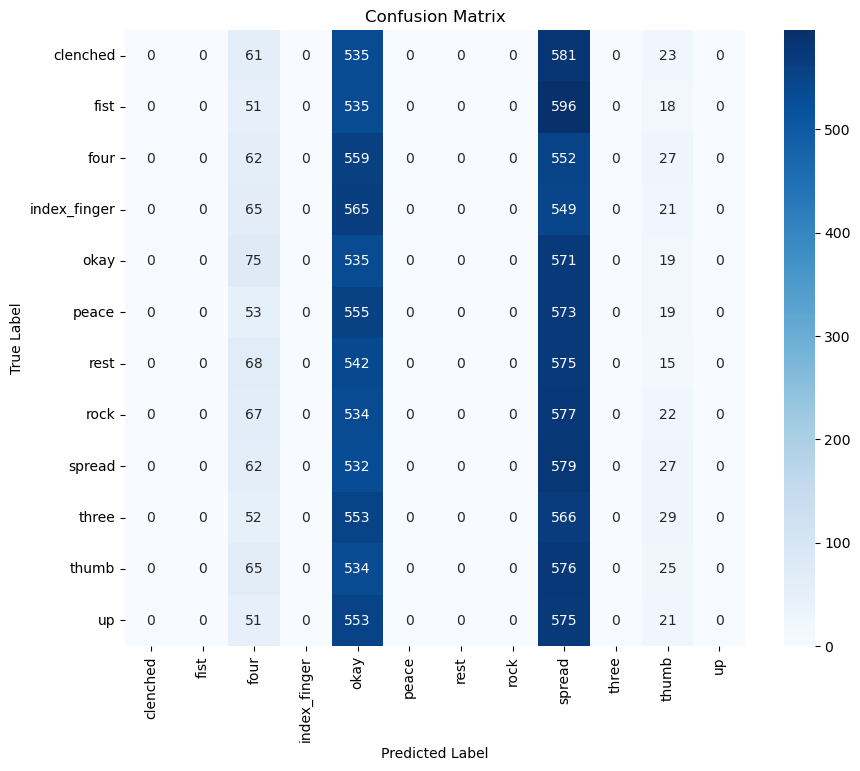

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_, cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()